In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "marginal_distributions"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.062667,0.050680,0.091127,-0.016114,0.080800,-0.076859,-0.090588,0.093351,0.083146,-0.079944,268.987807
1,0.025839,0.050680,0.149323,-0.001173,0.014570,0.142133,0.085748,0.159631,-0.035050,-0.039147,318.674646
2,-0.061884,0.050680,0.077871,0.050742,-0.092804,0.075688,0.155287,0.107517,0.117988,0.126051,209.482576
3,0.103708,-0.044642,0.122946,0.119359,-0.029309,-0.021308,-0.030116,0.044476,0.104890,-0.126430,329.571141
4,0.051255,-0.044642,0.075567,-0.067057,0.000477,0.131432,-0.081192,0.016230,0.034052,-0.012608,122.715802
5,-0.087234,0.050680,0.088424,0.062345,0.073503,0.071254,0.004338,0.078468,0.102022,-0.030372,283.361858
6,0.020726,0.050680,-0.087633,-0.056186,-0.108755,0.152818,0.042138,0.127544,-0.015524,-0.108646,48.734369
7,-0.029781,0.050680,0.016751,0.024507,0.065752,-0.024300,0.149604,0.160617,-0.000644,0.073995,292.187251
8,-0.044248,-0.044642,-0.044979,0.022235,-0.012415,0.157119,0.040743,0.157904,0.101203,-0.041606,70.259979
9,-0.101113,-0.044642,-0.043612,0.068405,-0.000100,-0.088724,-0.000801,0.028071,0.105419,0.128903,197.276092


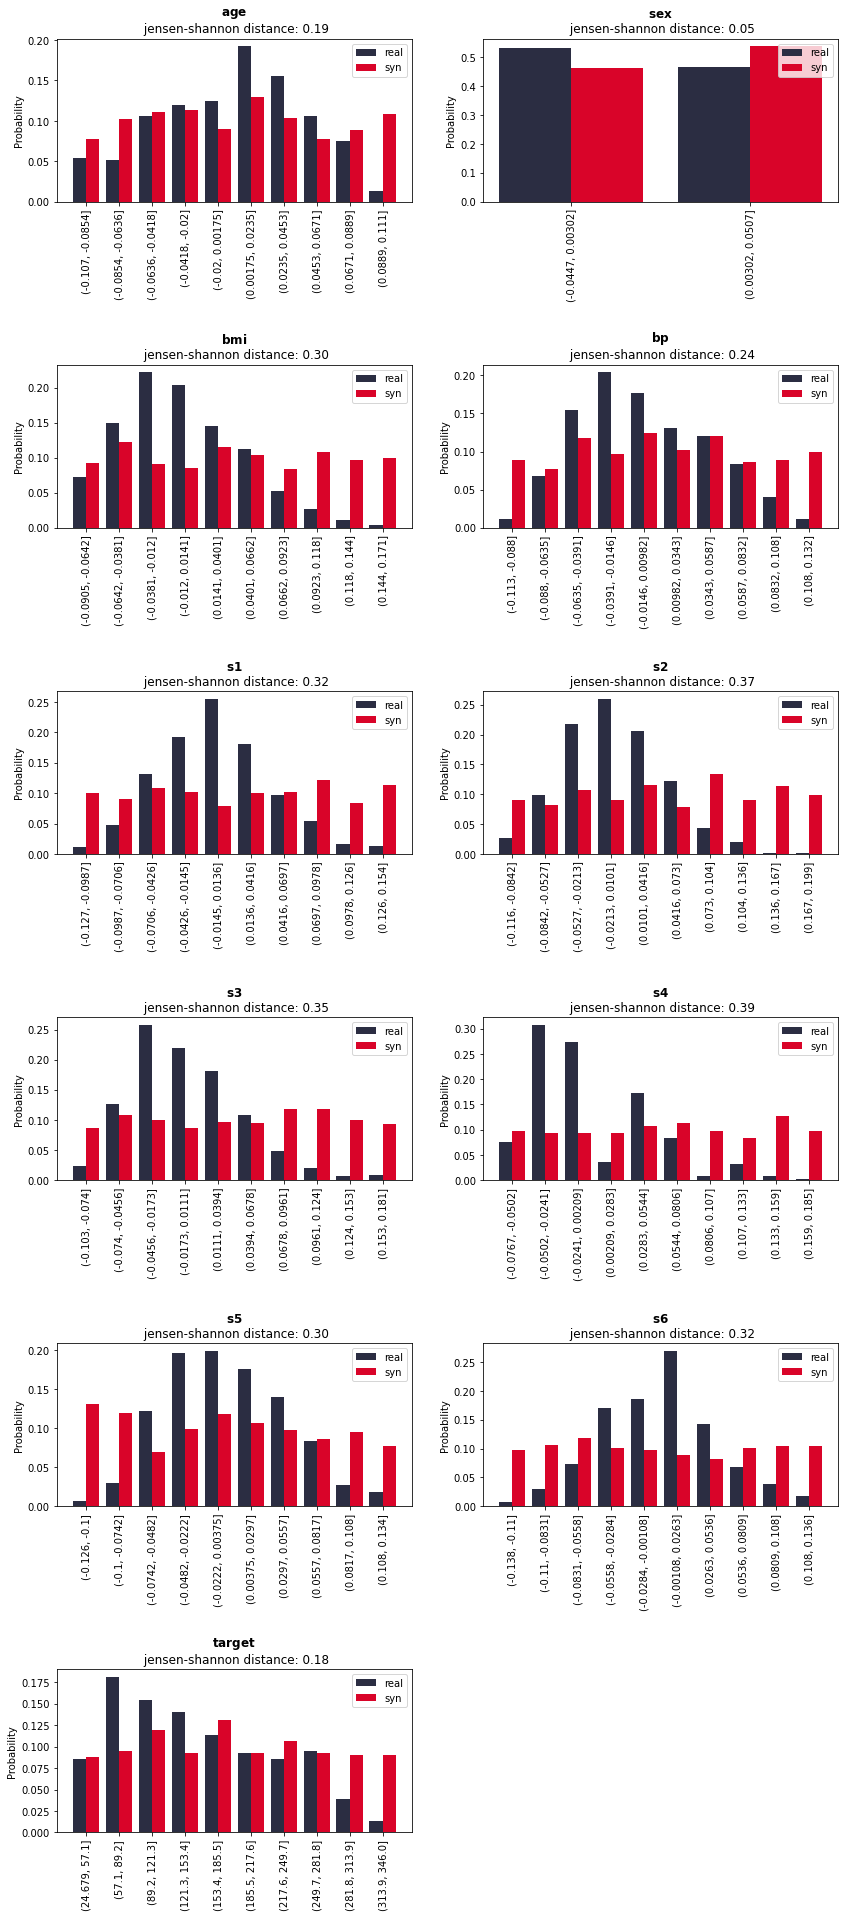

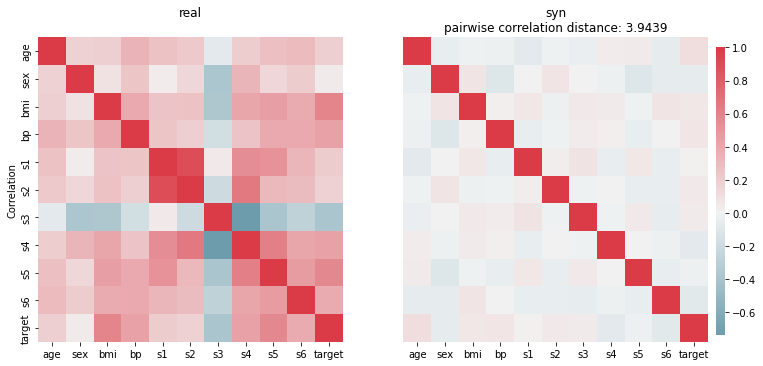

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : marginal_distributions


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.01
sanity.nearest_syn_neighbor_distance,0.103918,0.203018,0.153473,0.040458,0.153485,0.049550,3,0,0.02
sanity.inlier_probability,0.656109,0.857466,0.754902,0.082247,0.751131,0.100679,3,0,0.01
sanity.outlier_probability,0.002262,0.002262,0.002262,0.000000,0.002262,0.000000,3,0,0.02
statistical.marginal.jensenshannon_distance,0.267605,0.278204,0.272044,0.004495,0.270323,0.005300,3,0,0.30
statistical.marginal.chi_squared_test,0.995597,0.998510,0.997400,0.001287,0.998095,0.001456,3,0,0.04
statistical.joint.feature_correlation,3.866910,3.939664,3.914523,0.033684,3.936993,0.036377,3,0,0.26
statistical.marginal.inverse_cdf_distance,0.142785,0.147389,0.144912,0.001896,0.144563,0.002302,3,0,7.48
statistical.marginal.inverse_kl_divergence,0.770914,0.783785,0.778541,0.005518,0.780924,0.006435,3,0,0.03
